In [14]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [70]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2), padding="same"),
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
    ])

In [71]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [72]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [73]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


In [74]:
train_generator = train_datagen.flow_from_directory(
        'Dataset3',
        target_size=(128, 128),
        batch_size=32,
        class_mode='sparse')
# validation_generator = test_datagen.flow_from_directory(
#         'Dataset1/test',
#         target_size=(128, 128),
#         batch_size=32,
#         class_mode='sparse')
print(train_generator[0][0][0][0].shape)

Found 6000 images belonging to 3 classes.


ValueError: could not broadcast input array from shape (128,128,3) into shape (128,128,1,3)

In [58]:
model.fit(
        train_generator,
        steps_per_epoch=188,
        epochs=2,
        )

Epoch 1/2
188/188 [==============================] - 50s 267ms/step - loss: 0.6547 - accuracy: 0.7210
Epoch 2/2
188/188 [==============================] - 21s 114ms/step - loss: 0.2041 - accuracy: 0.9387


In [75]:
model.save("model.h5")

In [76]:
import numpy as np

In [78]:
a = np.zeros((5,5))
a

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [83]:
b = np.ones((2,3))
b

array([[1., 1., 1.],
       [1., 1., 1.]])

In [82]:
a[2:4,2:5] = b
a

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1.],
       [0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0.]])

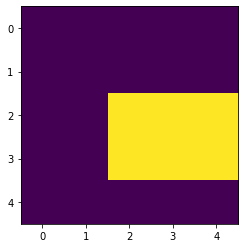

In [86]:
import matplotlib.pyplot as plt
plt.imshow(a/255.0)
# plt.imshow(b)
plt.show()

In [87]:
import cv2

In [88]:
a = cv2.imread("Dataset/paper/paper0.jpg")
a.shape

(250, 250, 3)

In [101]:
b = cv2.imread("computer/270a.png")
b = cv2.cvtColor(b, cv2.COLOR_BGR2RGB)

In [102]:
a[:128,:128] = b

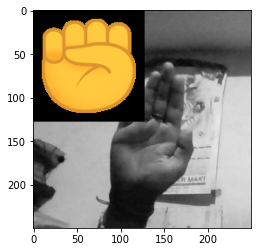

In [100]:
plt.imshow(a)
plt.show()